You have been given a dataset of images of handwritten digits (0-9) along with corresponding labels. Your task is to build a deep learning model using TensorFlow that can accurately classify new handwritten digits.

Your model should have the following architecture:

Input layer with 784 nodes (one for each pixel in the 28x28 image)
Two hidden layers with 256 nodes each
Output layer with 10 nodes (one for each possible digit)
Your model should use the ReLU activation function for the hidden layers and the softmax activation function for the output layer. Additionally, your model should use the categorical cross-entropy loss function and the Adam optimizer.

In [ ]:
from keras.datasets import mnist
import tensorflow as tf

In [ ]:
# loading the dataset
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [ ]:
(X_train_full.shape, y_train_full.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [ ]:
# splitting the dataset into training and validation part and normalizing them to 0 to 1
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

In [ ]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
    tf.keras.layers.Dense(256, activation="relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(256, activation="relu", name="hiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential(LAYERS)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 256)               200960    
                                                                 
 hiddenLayer2 (Dense)        (None, 256)               65792     
                                                                 
 outputLayer (Dense)         (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden_layer1 = model.layers[1]
model.get_layer(hidden_layer1.name)

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

In [ ]:
model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [ ]:
EPOCHS = 15
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/15
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0294 - accuracy: 0.9895 - val_loss: 0.0770 - val_accuracy: 0.9790
Epoch 2/15
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0833 - val_accuracy: 0.9828
Epoch 3/15
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0885 - val_accuracy: 0.9808
Epoch 4/15
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.0877 - val_accuracy: 0.9798
Epoch 5/15
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0833 - val_accuracy: 0.9818
Epoch 6/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.1029 - val_accuracy: 0.9812
Epoch 7/15
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0991 - val_ac

In [ ]:
# Evaluatimg the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1308 - accuracy: 0.9816


[0.13076582551002502, 0.9815999865531921]

In [ ]:
X_new = X_test[:3]
y_new = y_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 96ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_pred = np.argmax(y_prob, axis=1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

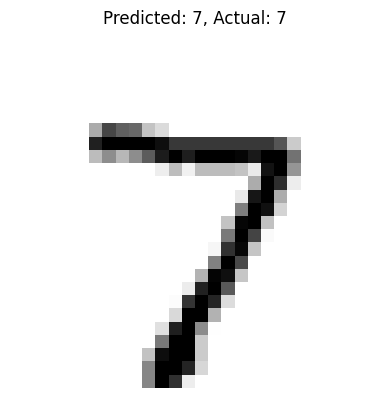

----------------------------------------


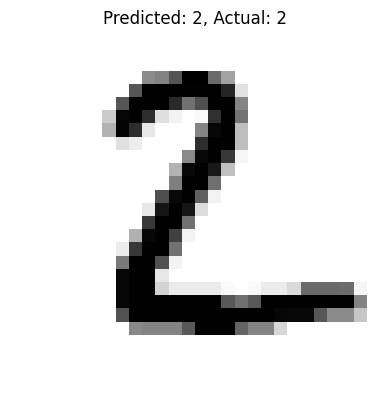

----------------------------------------


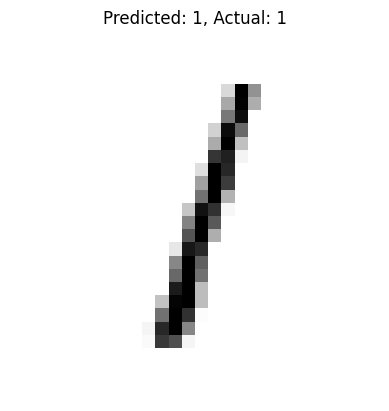

----------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*20)

In [ ]:
from PIL import Image
img = Image.open("/content/sample_data/three.png").convert('L').resize((28, 28), Image.ANTIALIAS)
img = np.array(img)
# model.predict(img[None,:,:])

<ipython-input-38-612d537603ed>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = Image.open("/content/sample_data/three.png").convert('L').resize((28, 28), Image.ANTIALIAS)


In [ ]:
model.predict(img[None, :, :])

1/1 [==============================] - 0s 88ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_prob = model.predict(img[None, :, :])
y_prob.round(2)

1/1 [==============================] - 0s 26ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = [3]

Implement an algorithms using opencv that detect and track multiple objects of different shapes and sizes in a real-time video stream, while accurately estimating their positions and orientations

In [ ]:
# # Install required dependencies
# !pip install opencv-python-headless
# !pip install tensorflow

# # Clone the tensorflow-yolov4-tflite repository
# !git clone https://github.com/hunglc007/tensorflow-yolov4-tflite.git
!pip install opencv-python-headless numpy

In [ ]:
import cv2
import numpy as np
import urllib.request

# Download the YOLOv4-tf model files from the official repository
cfg_url = "https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4-tiny.cfg"
weights_url = "https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights"
cfg_path = "yolov4-tiny.cfg"
weights_path = "yolov4-tiny.weights"
urllib.request.urlretrieve(cfg_url, cfg_path)
urllib.request.urlretrieve(weights_url, weights_path)

# Load the YOLOv4-tf model
net = cv2.dnn_DetectionModel(cfg_path, weights_path)
net.setInputSize(416, 416)
net.setInputScale(1.0 / 255)
net.setInputSwapRB(True)
class_names_path = "/content/tensorflow-yolov4-tflite/data/classes/coco.names"
with open(class_names_path, "r") as f:
    class_names = f.read().strip().split("\n")

# Set the confidence threshold and non-maximum suppression threshold
conf_threshold = 0.5
nms_threshold = 0.3

def detect_objects(image):
    classes, confidences, boxes = net.detect(image, confThreshold=conf_threshold, nmsThreshold=nms_threshold)

    if len(classes) > 0:
        for class_id, confidence, box in zip(classes.flatten(), confidences.flatten(), boxes):
            label = f"{class_names[class_id]}: {confidence:.2f}"
            color = (0, 255, 0)
            x, y, w, h = box
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image






In [ ]:
video_stream = cv2.VideoCapture(0)

while True:
    ret, frame = video_stream.read()
    if not ret:
        break

    frame = detect_objects(frame)

    cv2.imshow("Object Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [ ]:
video_stream.release()
cv2.destroyAllWindows()

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

Write python program that simulates a distributed system with multiple nodes communicating with each other over a network. The program should use coroutines and futures to handle concurrency and should be able to recover from node failures without crashing or losing data. The program should also use non-blocking I/O to maximize performance and scalability.

In [ ]:
import asyncio
import random

class DistributedNode:
    def __init__(self, node_id, initial_data=None):
        self.node_id = node_id
        self.data = initial_data if initial_data else {}
        self.neighbours = set()

    async def handle_connection(self, reader, writer):
        data = await reader.read(100)
        message = data.decode()

        if message.startswith('PUT'):
            _, key, value = message.split()
            self.data[key] = value
            print(f"Node {self.node_id} received PUT request: {key}={value}")
            self.replicate_to_neighbours(message)
        elif message.startswith('GET'):
            _, key = message.split()
            value = self.data.get(key, "Not found")
            writer.write(value.encode())
            await writer.drain()
        else:
            print(f"Node {self.node_id} received an invalid request: {message}")

        writer.close()

    async def replicate_to_neighbours(self, message):
        # Simulate some network delay
        await asyncio.sleep(random.uniform(0.1, 0.5))

        for neighbour in self.neighbours:
            host, port = neighbour
            try:
                reader, writer = await asyncio.open_connection(host, port)
                writer.write(message.encode())
                await writer.drain()
                writer.close()
                await writer.wait_closed()
                print(f"Node {self.node_id} replicated data to {host}:{port}")
            except:
                print(f"Node {self.node_id} failed to replicate data to {host}:{port}")

    async def run(self, host, port):
        server = await asyncio.start_server(self.handle_connection, host, port)
        print(f"Node {self.node_id} is running on {host}:{port}")

        async with server:
            await server.serve_forever()

    def add_neighbour(self, host, port):
        self.neighbours.add((host, port))

def main():
    nodes = []
    num_nodes = 5

    for i in range(num_nodes):
        node = DistributedNode(node_id=i)
        nodes.append(node)

    # Connect the nodes in a ring-like topology for simplicity
    for i in range(num_nodes):
        next_node = nodes[(i + 1) % num_nodes]
        nodes[i].add_neighbour('127.0.0.1', 5000 + next_node.node_id)

    loop = asyncio.get_event_loop()
    tasks = [node.run('127.0.0.1', 5000 + node.node_id) for node in nodes]
    loop.run_until_complete(asyncio.gather(*tasks))

if __name__ == "__main__":
    main()


RuntimeError: ignored

Node 0 is running on 127.0.0.1:5000
Node 1 is running on 127.0.0.1:5001
Node 2 is running on 127.0.0.1:5002
Node 3 is running on 127.0.0.1:5003
Node 4 is running on 127.0.0.1:5004


Write a Python program  that takes a text document as input and returns a list of the top 5 most frequent nouns, excluding stop words and punctuation marks.

In [ ]:
!pip install nltk
import nltk
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

def get_top_nouns(text, n=5):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation marks
    table = str.maketrans("", "", string.punctuation)
    tokens = [token.translate(table) for token in tokens if token.translate(table).strip() != ""]

    # Get part-of-speech tags
    pos_tags = nltk.pos_tag(tokens)

    # Extract nouns and convert to lowercase
    nouns = [word.lower() for word, pos in pos_tags if pos.startswith("NN") and word.lower() not in stopwords.words("english")]

    # Calculate frequency distribution of nouns
    fdist = FreqDist(nouns)

    # Get the top n most frequent nouns
    top_nouns = fdist.most_common(n)

    return top_nouns

if __name__ == "__main__":
    # Read the input text from a file
    file_path = "/content/sample_data/test.txt"
    with open(file_path, "r") as file:
        text = file.read()

    top_nouns = get_top_nouns(text)

    print("Top 5 most frequent nouns (excluding stop words and punctuation marks):")
    for noun, frequency in top_nouns:
        print(f"{noun}: {frequency}")


Top 5 most frequent nouns (excluding stop words and punctuation marks):
python: 14
project: 3
code: 3
van: 2
rossum: 2
